In [7]:
from src.research.def_model import model_func
import src
import src.entities.utils as utils

from pathlib import Path
import time
import random


NAME_OF_RUN = None
N_REPS = 5
N_AGENTS = 10000

SAVE_DATA = False

In [8]:
random.seed(1)
run_folder_path = Path.joinpath(
    src.PATH,
    "data_output",
    "run_" + (utils.str_time() if NAME_OF_RUN is None else NAME_OF_RUN),
)
model_output = model_func(
    master_model_index=0,
    run_folder_path=run_folder_path,
    mode="eval",
    n_replications=N_REPS,
    n_agents=N_AGENTS,
    scaling_factor=1,
)["model_output"]

[18:44:37.036] Starte model_func 0


KeyboardInterrupt: 

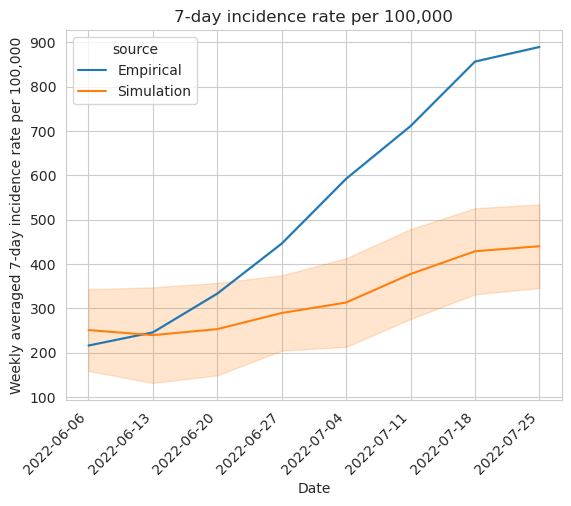

In [ ]:
inc_eval = model_output.eval_incidence(
    sim_date_col="date_symptomatic",
    per_replication=True,
)

df_inc = inc_eval["df_incidence"]

if SAVE_DATA:
    df_inc.to_csv(
        Path.joinpath(src.PATH, "data_output", "eval", "df_eval_infections_inc7.csv")
    )

In [ ]:
eval_cum_infections = model_output.eval_cum_infections_by_age(
    "ever_infected_with_symptoms",
    emp_start_date=model_output.start_date,
    emp_end_date=model_output.end_date,
    plot_4=False,
    age_specific=False,
)
df_cum_infections_simple = eval_cum_infections["df"]

if SAVE_DATA:
    df_cum_infections_simple.to_csv(
        Path.joinpath(
            src.PATH, "data_output", "eval", "df_eval_infections_cum_infections_rel.csv"
        )
    )
    print(df_cum_infections_simple)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
eval_cum_infections = model_output.eval_cum_infections_by_age(
    "ever_infected_with_symptoms",
    emp_start_date=model_output.start_date,
    emp_end_date=model_output.end_date,
    plot_4=False,
    age_specific=True,
)
df_age_infections = eval_cum_infections["df"]

if SAVE_DATA:
    df_age_infections.to_csv(
        Path.joinpath(
            src.PATH,
            "data_output",
            "eval",
            "df_eval_infections_cum_infections_age_rel.csv",
        )
    )

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.



______________________________________
Location:all_locations
______________________________________

pearson's R: 0.9167769034323527


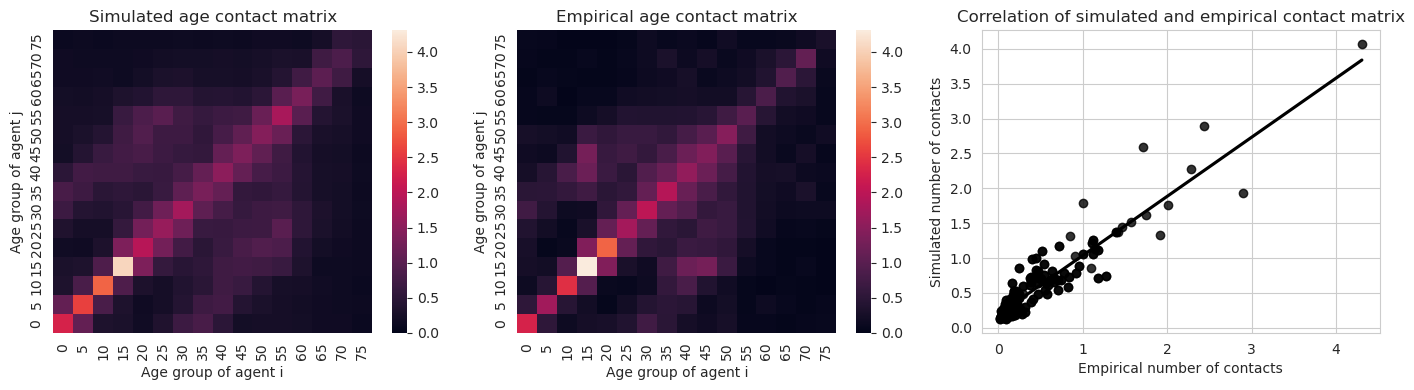

In [ ]:
model_output.eval_age_contact_matrix(
    weighted_sim_contacts=False, same_color_scale=True, save_data=SAVE_DATA
)